# PCA with an undercomplete AE

In [10]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [11]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

In [12]:
np.random.seed(4)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

In [13]:
X_train.shape

(60, 3)

In [14]:
encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1.5))

In [15]:
autoencoder.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 2)                 8         
                                                                 
 sequential_4 (Sequential)   (None, 3)                 9         
                                                                 
Total params: 17 (68.00 Byte)
Trainable params: 17 (68.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
history = autoencoder.fit(X_train, X_train, epochs=20)

Epoch 1/20
2/2 [==============================] - 1s 10ms/step - loss: 1.1243
Epoch 2/20
2/2 [==============================] - 0s 6ms/step - loss: 1.0581
Epoch 3/20
2/2 [==============================] - 0s 6ms/step - loss: 0.9976
Epoch 4/20
2/2 [==============================] - 0s 6ms/step - loss: 0.9440
Epoch 5/20
2/2 [==============================] - 0s 6ms/step - loss: 0.8947
Epoch 6/20
2/2 [==============================] - 0s 5ms/step - loss: 0.8500
Epoch 7/20
2/2 [==============================] - 0s 6ms/step - loss: 0.8091
Epoch 8/20
2/2 [==============================] - 0s 6ms/step - loss: 0.7717
Epoch 9/20
2/2 [==============================] - 0s 6ms/step - loss: 0.7373
Epoch 10/20
2/2 [==============================] - 0s 5ms/step - loss: 0.7054
Epoch 11/20
2/2 [==============================] - 0s 6ms/step - loss: 0.6760
Epoch 12/20
2/2 [==============================] - 0s 6ms/step - loss: 0.6490
Epoch 13/20
2/2 [==============================] - 0s 6ms/step - loss: 0

In [17]:
codings = encoder.predict(X_train)

2/2 [==============================] - 0s 4ms/step


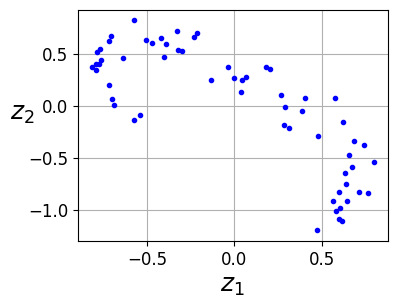

In [18]:
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()